In [16]:
import pandas as pd
# import numpy as np
import io
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pathlib
import warnings
warnings.filterwarnings('ignore')

In [17]:
df = pd.read_csv(r"..\data\1\air_quality.csv")
print()
print("Sample of dataset")
print(df.head())
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Sample of dataset
               date   sitename          county   aqi pollutant    status  so2  \
0  2024-08-31 23:00      Hukou  Hsinchu County  62.0     PM2.5  Moderate  0.9   
1  2024-08-31 23:00  Zhongming   Taichung City  50.0       NaN      Good  1.6   
2  2024-08-31 23:00    Zhudong  Hsinchu County  45.0       NaN      Good  0.4   
3  2024-08-31 23:00    Hsinchu    Hsinchu City  42.0       NaN      Good  0.8   
4  2024-08-31 23:00     Toufen   Miaoli County  50.0       NaN      Good  1.0   

     co    o3 o3_8hr  ... windspeed winddirec unit co_8hr pm2.5_avg pm10_avg  \
0  0.17  35.0   40.2  ...       2.3       225  NaN    0.2      20.1     26.0   
1  0.32  27.9   35.1  ...       1.1       184  NaN    0.2      15.3     23.0   
2  0.17  25.1   40.6  ...       0.4       210  NaN    0.2      13.8     24.0   
3   0.2  30.0   35.9  ...       1.9       239  NaN    0.2      13.0     26.0   
4  0.16  33.5   35.9  ...       1.8       259  NaN    0.1      15.3     28.0   

  so2_avg   l

In [18]:
print("Data types, nulls and memory size:")
print(df.info(verbose=True))

Data types, nulls and memory size:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5882208 entries, 0 to 5882207
Data columns (total 25 columns):
 #   Column     Dtype  
---  ------     -----  
 0   date       object 
 1   sitename   object 
 2   county     object 
 3   aqi        float64
 4   pollutant  object 
 5   status     object 
 6   so2        object 
 7   co         object 
 8   o3         object 
 9   o3_8hr     object 
 10  pm10       object 
 11  pm2.5      object 
 12  no2        object 
 13  nox        object 
 14  no         object 
 15  windspeed  object 
 16  winddirec  object 
 17  unit       float64
 18  co_8hr     object 
 19  pm2.5_avg  object 
 20  pm10_avg   object 
 21  so2_avg    object 
 22  longitude  float64
 23  latitude   float64
 24  siteid     float64
dtypes: float64(5), object(20)
memory usage: 1.1+ GB
None


In [19]:
print("Statistical description of numerical columns:")
print(df.describe())

Statistical description of numerical columns:
                aqi  unit     longitude      latitude        siteid
count  5.839188e+06   0.0  4.948588e+06  4.948588e+06  4.102739e+06
mean   5.419277e+01   NaN  1.208235e+02  2.404500e+01  5.608608e+01
std    2.985864e+01   NaN  9.644120e-01  1.002014e+00  6.233482e+01
min   -1.000000e+00   NaN  0.000000e+00  0.000000e+00  0.000000e+00
25%    3.200000e+01   NaN  1.203455e+02  2.304820e+01  2.100000e+01
50%    4.600000e+01   NaN  1.206853e+02  2.415196e+01  4.200000e+01
75%    7.000000e+01   NaN  1.214492e+02  2.501297e+01  6.500000e+01
max    5.000000e+02   NaN  1.218157e+02  2.625800e+01  3.140000e+02


In [20]:
print("Proportion of missing values:")
print(df.isnull().sum()/df.shape[0])


Proportion of missing values:
date         0.000000
sitename     0.000000
county       0.000000
aqi          0.007314
pollutant    0.549966
status       0.024263
so2          0.023761
co           0.019296
o3           0.021253
o3_8hr       0.022284
pm10         0.023861
pm2.5        0.022345
no2          0.028217
nox          0.028752
no           0.028808
windspeed    0.037316
winddirec    0.037356
unit         1.000000
co_8hr       0.013809
pm2.5_avg    0.013590
pm10_avg     0.015279
so2_avg      0.106960
longitude    0.158719
latitude     0.158719
siteid       0.302517
dtype: float64


In [21]:
unique_sites = df["siteid"].unique()
print(f"Number of sites: {len(unique_sites)}")


Number of sites: 99


In [22]:
def my_rm_na_foo(df_col, col_name, plot1=True):
    def foo(x):
        if isinstance(x, str):
            try:
                return np.float64(x)
            except:
                return np.nan
        return np.float64(x)
    myl = list(map(foo, df_col))
    if plot1:
        ax = sns.lineplot(myl)
        ax.set_title(col_name)
        plt.show()
    return myl

In [23]:
my_data={}
for col_name in df.columns:
    my_data[col_name]=my_rm_na_foo(df[col_name].values, col_name, False)
my_data = pd.DataFrame(my_data)

In [24]:
type(my_data.sitename[0])

numpy.float64

In [25]:
for col_name in my_data.columns:
    if math.isnan(my_data[col_name][0]):
        print(f"this col is nan: {col_name}")
        if col_name == "date":
            my_data[col_name] = pd.to_datetime(df["date"], format='mixed')
        else:
            my_data[col_name] = df[col_name].astype('category')
    continue

this col is nan: date
this col is nan: sitename
this col is nan: county
this col is nan: pollutant
this col is nan: status
this col is nan: unit


In [26]:
print("Sample of dataset")
print(my_data.head())

Sample of dataset
                 date   sitename          county   aqi pollutant    status  \
0 2024-08-31 23:00:00      Hukou  Hsinchu County  62.0     PM2.5  Moderate   
1 2024-08-31 23:00:00  Zhongming   Taichung City  50.0       NaN      Good   
2 2024-08-31 23:00:00    Zhudong  Hsinchu County  45.0       NaN      Good   
3 2024-08-31 23:00:00    Hsinchu    Hsinchu City  42.0       NaN      Good   
4 2024-08-31 23:00:00     Toufen   Miaoli County  50.0       NaN      Good   

   so2    co    o3  o3_8hr  ...  windspeed  winddirec  unit  co_8hr  \
0  0.9  0.17  35.0    40.2  ...        2.3      225.0   NaN     0.2   
1  1.6  0.32  27.9    35.1  ...        1.1      184.0   NaN     0.2   
2  0.4  0.17  25.1    40.6  ...        0.4      210.0   NaN     0.2   
3  0.8  0.20  30.0    35.9  ...        1.9      239.0   NaN     0.2   
4  1.0  0.16  33.5    35.9  ...        1.8      259.0   NaN     0.1   

   pm2.5_avg  pm10_avg  so2_avg   longitude   latitude  siteid  
0       20.1      26.

In [27]:
my_data.describe()

date           aqi           so2  \
count                        5882208  5.839188e+06  5.742417e+06   
mean   2020-11-22 11:07:22.142338304  5.419277e+01  1.994126e+00   
min              2016-11-25 13:00:00 -1.000000e+00 -9.990000e+02   
25%              2019-02-06 01:00:00  3.200000e+01  1.000000e+00   
50%              2021-01-29 23:00:00  4.600000e+01  1.700000e+00   
75%              2022-09-07 17:00:00  7.000000e+01  2.500000e+00   
max              2024-08-31 23:00:00  5.000000e+02  2.554000e+02   
std                              NaN  2.985864e+01  1.875789e+00   

                 co            o3        o3_8hr          pm10         pm2.5  \
count  5.728077e+06  5.674782e+06  5.728560e+06  5.735555e+06  5.679983e+06   
mean   3.386322e-01  3.042044e+01  3.034839e+01  3.438227e+01  1.684545e+01   
min   -9.990000e+02 -9.990000e+02 -1.000000e+00 -9.990000e+02 -9.990000e+02   
25%    1.900000e-01  1.600000e+01  1.800000e+01  1.800000e+01  8.000000e+00   
50%    2.900000e-01  2.830000e+01  2.900000e+01  2.800000e+01  1.400000e+01   
75%    4.100000e-01  4.200000e+01  4.100000e+01  4.500000e+01  2.300000e+01   
max    3.858000e+01  4.100000e+02  1.358000e+02  1.407000e+03  1.000000e+03   
std    1.207092e+00  1.835347e+01  1.585036e+01  2.429474e+01  1.271984e+01   

                no2           nox            no     windspeed     winddirec  \
count  5.716208e+06  5.713061e+06  5.712730e+06  5.579525e+06  5.579287e+06   
mean   1.125193e+01  1.471644e+01  3.451216e+00  2.214170e+00  1.640792e+02   
min   -2.778000e+01 -1.600000e+00 -7.200000e+00 -4.000000e-01  0.000000e+00   
25%    5.000000e+00  6.200000e+00  7.000000e-01  1.100000e+00  5.500000e+01   
50%    9.000000e+00  1.080000e+01  1.400000e+00  1.800000e+00  1.510000e+02   
75%    1.500000e+01  1.800000e+01  2.700000e+00  2.900000e+00  2.710000e+02   
max    3.510500e+02  4.310000e+02  3.913100e+02  4.100000e+01  9.900000e+02   
std    8.678853e+00  1.488288e+01  8.357343e+00  1.693803e+00  1.149409e+02   

             co_8hr     pm2.5_avg      pm10_avg       so2_avg     longitude  \
count  5.778655e+06  5.802244e+06  5.786038e+06  5.253023e+06  4.948588e+06   
mean   3.186695e-01  1.666025e+01  3.416179e+01  1.647508e+00  1.208235e+02   
min   -1.000000e+00 -1.000000e+00 -1.000000e+00 -1.000000e+00  0.000000e+00   
25%    2.000000e-01  8.000000e+00  1.800000e+01  1.000000e+00  1.203455e+02   
50%    3.000000e-01  1.400000e+01  2.900000e+01  1.000000e+00  1.206853e+02   
75%    4.000000e-01  2.200000e+01  4.500000e+01  2.000000e+00  1.214492e+02   
max    2.600000e+01  2.450000e+02  7.650000e+02  6.000000e+01  1.218157e+02   
std    2.283210e-01  1.156664e+01  2.208988e+01  1.291949e+00  9.644120e-01   

           latitude        siteid  
count  4.948588e+06  4.102739e+06  
mean   2.404500e+01  5.608608e+01  
min    0.000000e+00  0.000000e+00  
25%    2.304820e+01  2.100000e+01  
50%    2.415196e+01  4.200000e+01  
75%    2.501297e+01  6.500000e+01  
max    2.625800e+01  3.140000e+02  
std    1.002014e+00  6.233482e+01

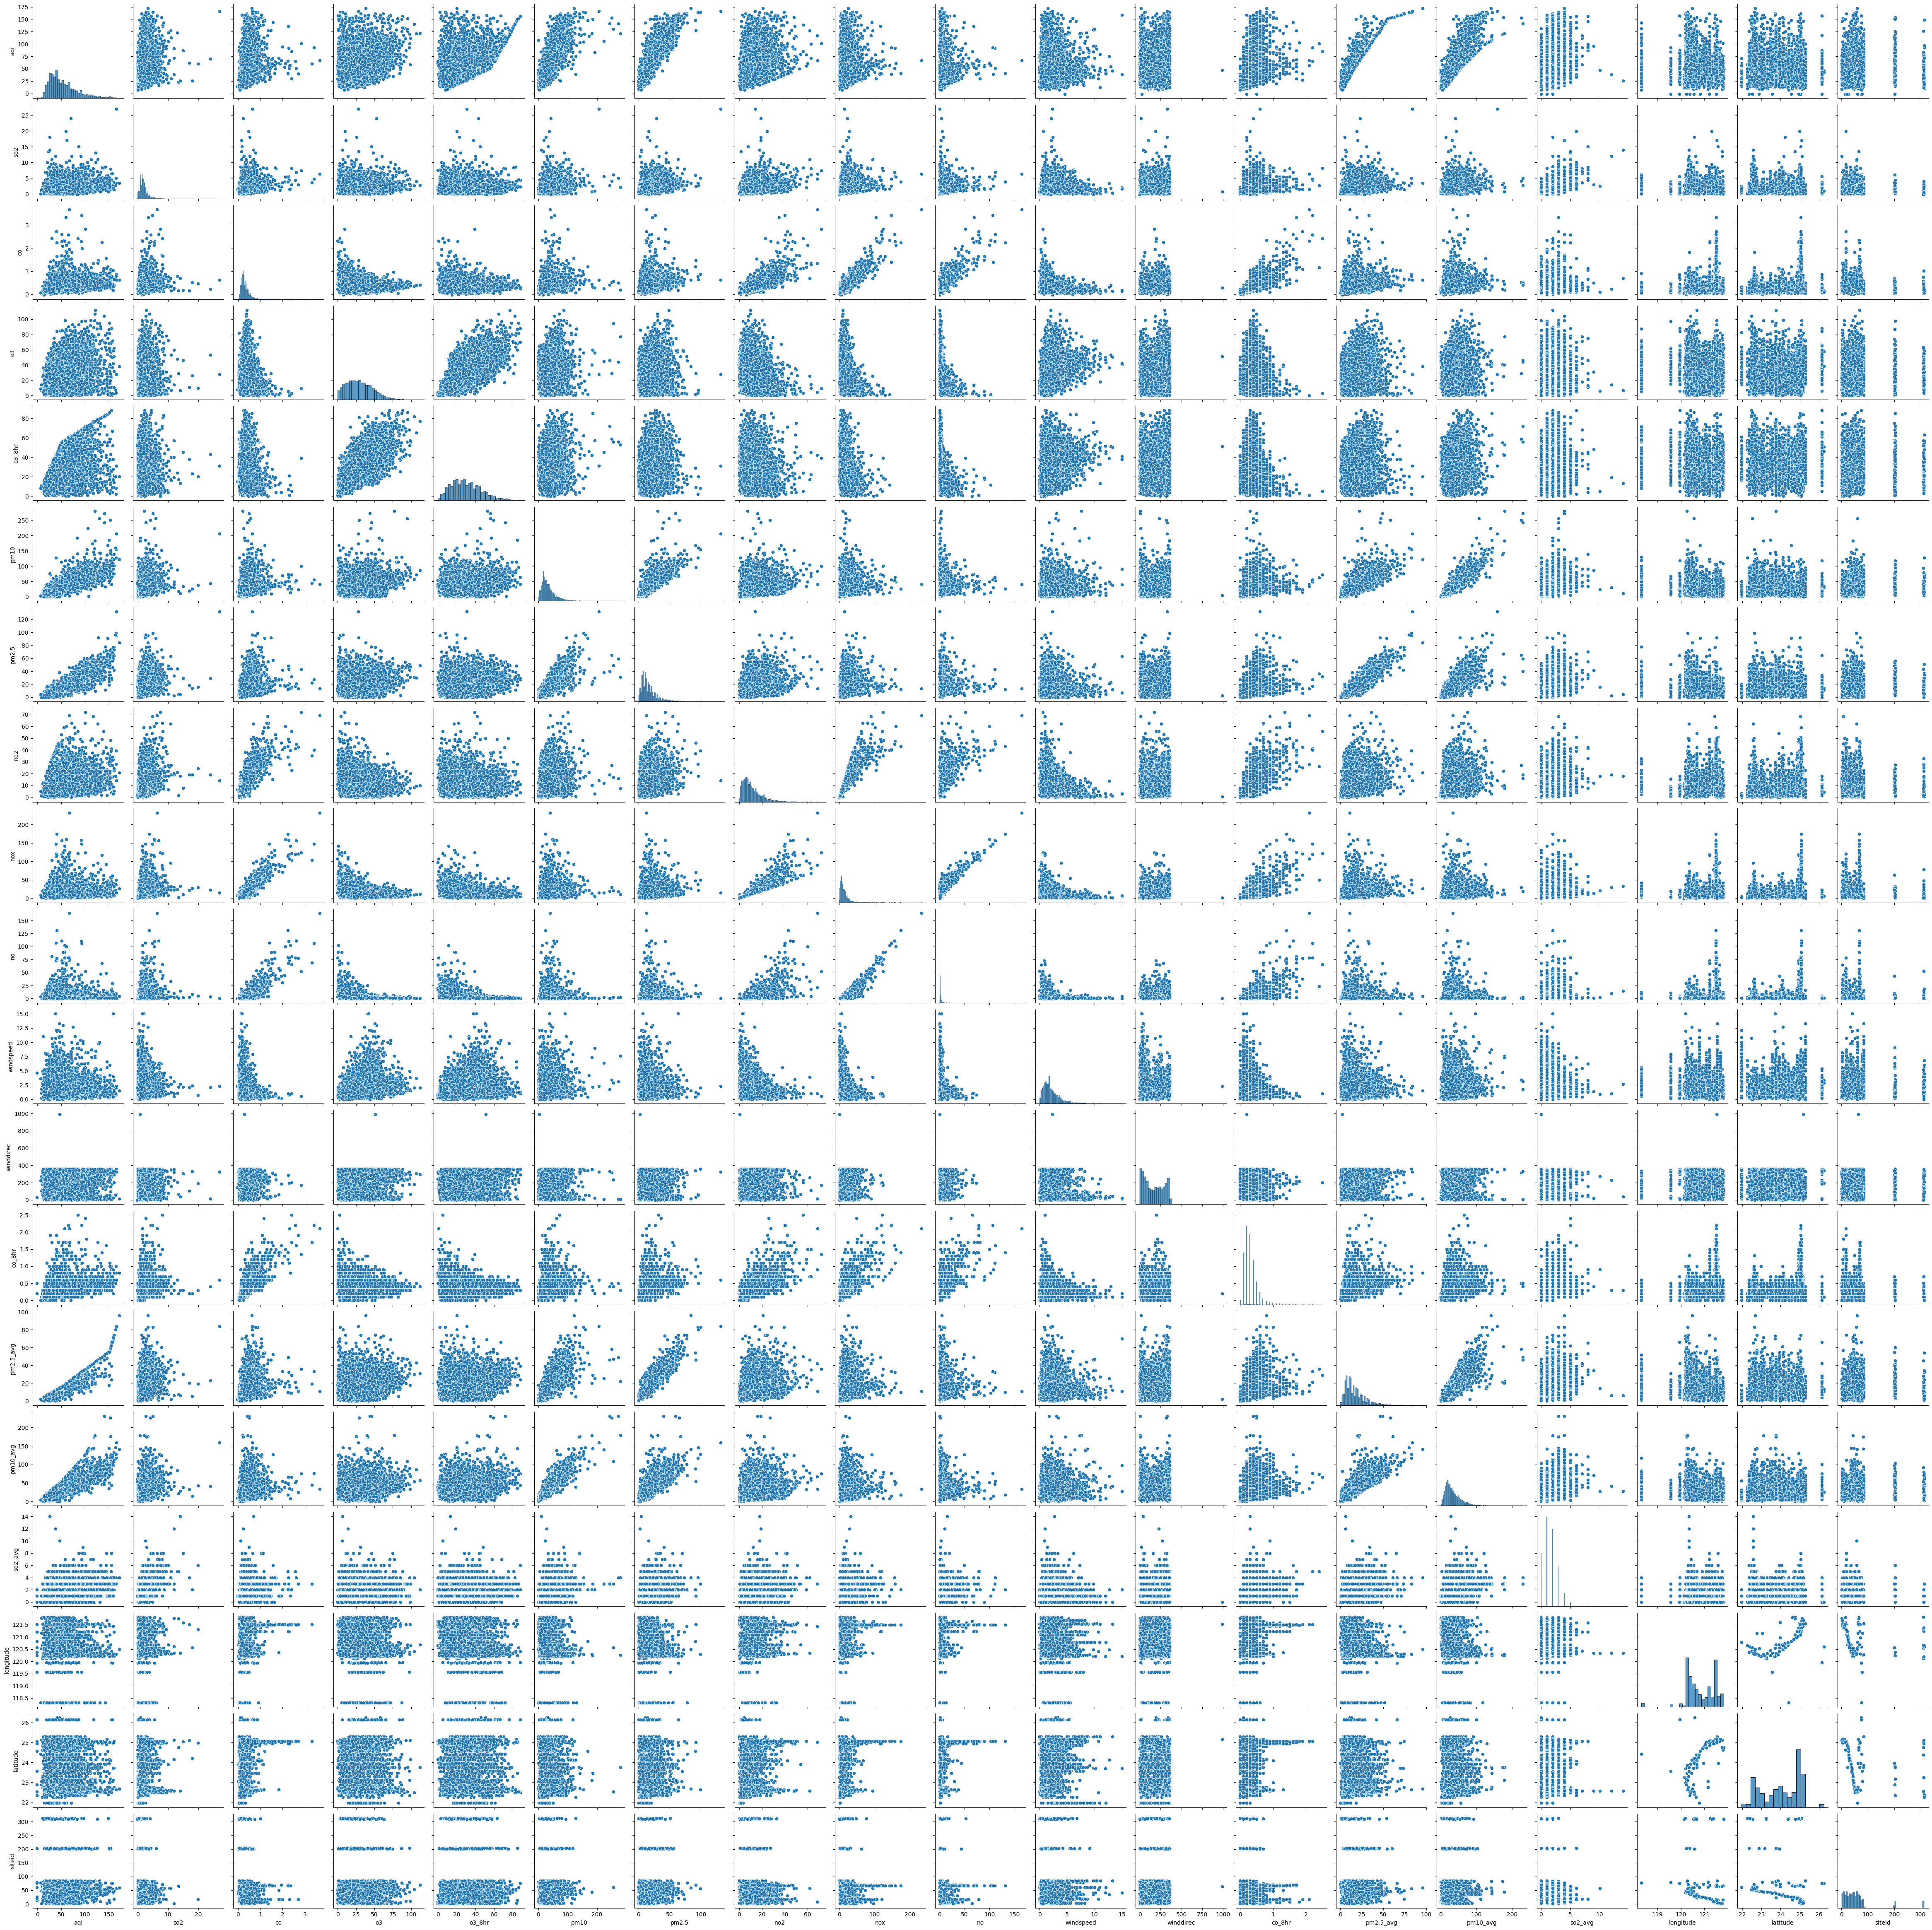

In [28]:
#full pairplot takes too long,  70> mins
sns.pairplot(my_data.sample(5000))

In [29]:
num_cols = [col_name for col_name in my_data.columns.to_list() if col_name not in ["date", "sitename", "county", "pollutant", "status"]]
num_cols


['aqi',
 'so2',
 'co',
 'o3',
 'o3_8hr',
 'pm10',
 'pm2.5',
 'no2',
 'nox',
 'no',
 'windspeed',
 'winddirec',
 'unit',
 'co_8hr',
 'pm2.5_avg',
 'pm10_avg',
 'so2_avg',
 'longitude',
 'latitude',
 'siteid']

<Axes: >

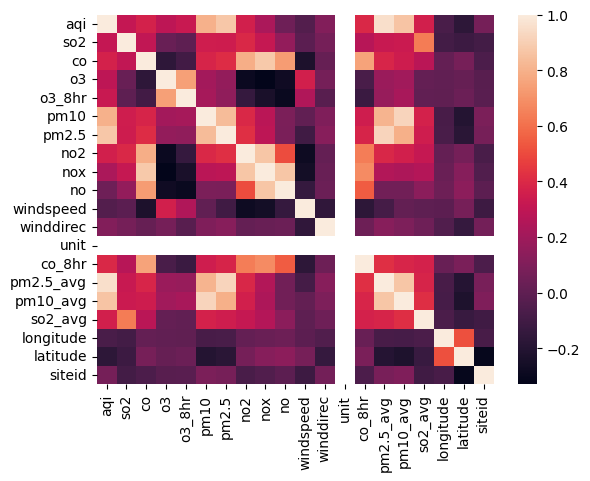

In [30]:
my_data1 = my_data.sample(5000).loc[:, num_cols]
corr = my_data1.corr()

sns.heatmap(corr)

In [31]:
# Save the preprocessed data
# sampled data since it's too large for github
my_data.sample(700000).to_pickle(r"..\data\air_quality.pkl")

Potential uses include

**Regression Analysis**: You can use regression techniques to predict AQI based on levels of specific pollutants like PM2.5, CO, and SO2. By treating AQI as the target variable(Remove Status column), you can build models to predict how pollutant concentrations impact air quality.

**Time Series Forecasting**: Using the date field, you can perform time series analysis to forecast future air quality levels based on historical pollutant concentrations, wind speed, and direction.

**Spatial Analysis**: Given the latitude and longitude columns (Country), you can visualize spatial trends in air quality, possibly identifying regions with consistently poor or good air quality.